In [3]:
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

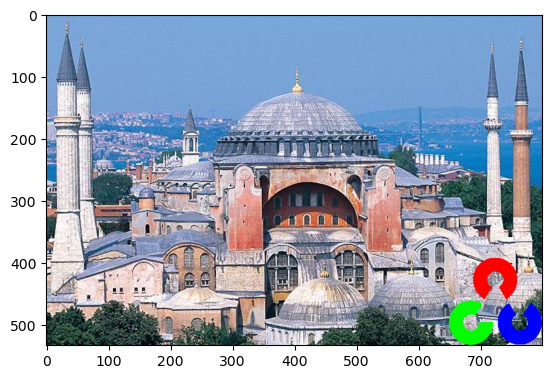

In [4]:
# Örnek 3.15 - maskeleme

kucukResim = cv2.imread('../DATA/11_opencv-logo-2.png')
buyukResim = cv2.imread("../DATA/1_ayasofya.jpg")
kucukResim = cv2.cvtColor(kucukResim,cv2.COLOR_BGR2RGB)
buyukResim = cv2.cvtColor(buyukResim,cv2.COLOR_BGR2RGB)

kYukseklik,kGenislik,kKanal = kucukResim.shape
bYukseklik,bGenislik,bKanal = buyukResim.shape

roi_alan = buyukResim[bYukseklik-kYukseklik:, bGenislik-kGenislik:].copy()
kucukResimGray = cv2.cvtColor(kucukResim,cv2.COLOR_RGB2GRAY)

ret, maske = cv2.threshold(kucukResimGray, 10, 255, cv2.THRESH_BINARY)
maske_tersi = cv2.bitwise_not(maske)

roi_alan_bg = cv2.bitwise_and(roi_alan, roi_alan, mask = maske_tersi)
roi_alan_fg = cv2.bitwise_and(kucukResim, kucukResim, mask = maske)

birlesmisParca = cv2.add(roi_alan_bg, roi_alan_fg)

buyukResim[bYukseklik-kYukseklik:, bGenislik-kGenislik:] = birlesmisParca
plt.imshow(buyukResim)

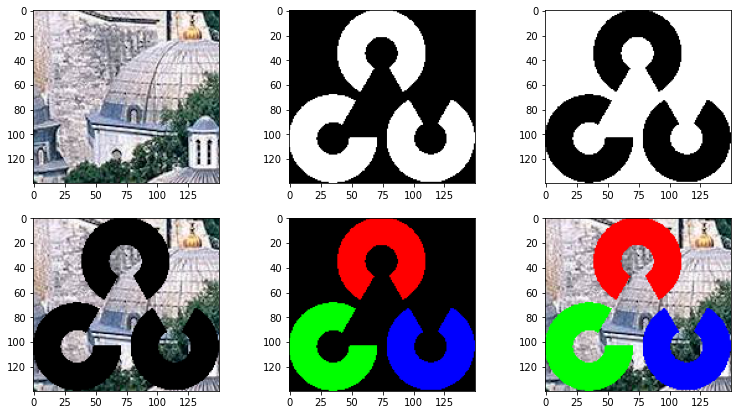

In [5]:
pencere = plt.figure(figsize=(13,7))
pencere.add_subplot(2,3,1)
plt.imshow(roi_alan)
pencere.add_subplot(2,3,2)
plt.imshow(maske,cmap="gray")
pencere.add_subplot(2,3,3)
plt.imshow(maske_tersi,cmap="gray")
pencere.add_subplot(2,3,4)
plt.imshow(roi_alan_bg)
pencere.add_subplot(2,3,5)
plt.imshow(roi_alan_fg)
pencere.add_subplot(2,3,6)
plt.imshow(birlesmisParca)